# NEUR472 - Assignment One

### 2a
#### Hair Cells & Modelling
Hair cells are an apt starting point for the modelling of neural activity as they are of great evolutionary importance to the neuron. The structure of these epithelial cells derives from animal life's closest common ancestor, the choanoflagellate, by virtue of a kinocilium surrounded by a net of microvilli (forming the stereocilia of the hair cell). This provides us with a bare bones, "simple" cell with which to build a model of membrane function, which we can build upon further as we investigate cellular and neural functions with increasing complexity. Furthermore, the simplicity of the hair cells means that we already have access to it's known inputs, environment, transduciton mechanisms, etc., which we can use as tools to build our model. The more we known about our example, the more we can be sure of our model.
### 2b
#### Equivalent Circuits & Differential Equations
Below is an equivalent circuit model of the neural membrane. The phospholipid bilayer that seperates the inside of the neural cell from it's external environment is studded with Na+/K+-ATPase, a protein that actively exports three sodium ions while importing two potassium. This lowers the concentration of positive ions at the membrane, increasing negative charge, and attracting external positive ions which are blocked by the phospholipid bilayer. Thus, the cell membrane acts as a capacitor, $c_{m}$. In our model, the membrane will also hold leaky and mechanoreceptor protein channels, shown as the resistors $g_{l}$ and $g_{m}$. These channels alter current flow, either completely in the case of the leaky channel ($g_{l}$) or variably by mechanoreceptive channels ($g_{m}$). Current can flow either way through these channels, thus completing the circuit.

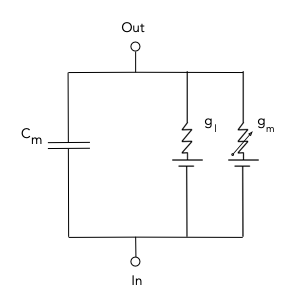

The relationship between membrane potential and the proportion of open
mechanoreceptor channels can be described in the following differential equation,

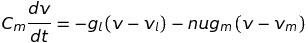

$C_{m}$ = membrane capacitance, $v$ = membrane potential, $g_{l}$ = resting membrane conductance, $v_{l}$ = resting membrane potential, $n$ = number of mechanoreceptor channels, $u$ = proprortion of open mechanoreceptors, $g_{m}$ = mechanoreceptor 
        

### 2c
#### Finite Approximation
Using Euler's method, we can approximate the above function and use it to simulate the behaviour of our membrane. This method provides us with a numerical approximation by projecting the slope at a point in time over a constant time-step, h, exampled below. The smaller the time-step, the more accurate the approximation. However, as the method is recursive where each step builds upon the last, it is also true that the smaller the time-step, the more intensive the computation. Commonly, a 100 microsecond time-step is used in such approximations. However, this is just standard practice and bears no real relevance to the time scale of events occuring at the membrane. Events at the mechanoreceptor may occur quicker than this time-step and thus will not be described in the model.

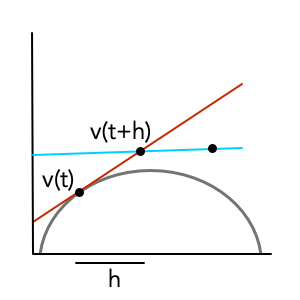

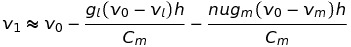

### 2d 
#### Step Change

In [1]:
using Plots
gr();

In [45]:
# Simulation Parameters
T = 0.03 
dt = 0.00001
t = Array(0.0:dt:T)
v = fill(0.0,length(t))
u = fill(0.0,length(t))
x = fill(0.0,length(t))
v[1] = -0.06
x[1] = -0.06;

In [3]:
# Biological Parameters
V_rest = -0.06
V_mech = -0.002
n = 48.0
g_leak = 1/250.0e6
g_mech = 0.5e-9
C = 30.0e-12
tau = C/g_leak;

In [4]:
# Euler Method
for i in 2:length(t)
   if i < 1000
        u[i] = 0.0
    else 
        u[i] = 1.0
    end
    fde = -g_leak*(v[i-1]-V_rest)*dt/C - n*u[i]*g_mech*(v[i-1]-V_mech)*dt/C
    v[i] = v[i-1] + fde
end

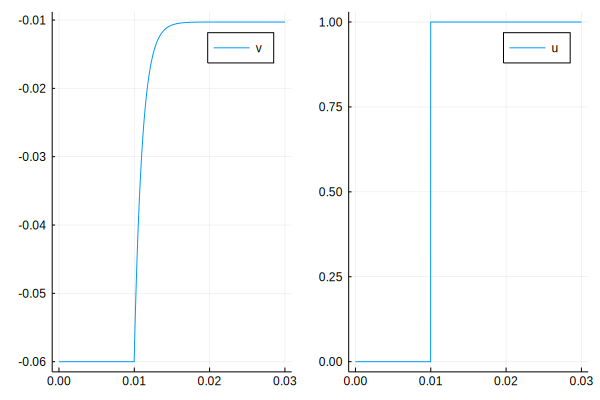

In [5]:
p1 = plot(t,v)
p2 = plot(t,u)
plot(p1,p2, label = ["v" "u"])

#### Square Pulse

In [6]:
# Euler Method
for i in 2:length(t)
   if i < 1000
        u[i] = 0.0
   elseif i > 2000
        u[i] = 0.0
    else 
        u[i] = 1.0
    end
    fde = -g_leak*(v[i-1]-V_rest)*dt/C - n*u[i]*g_mech*(v[i-1]-V_mech)*dt/C
    v[i] = v[i-1] + fde
end

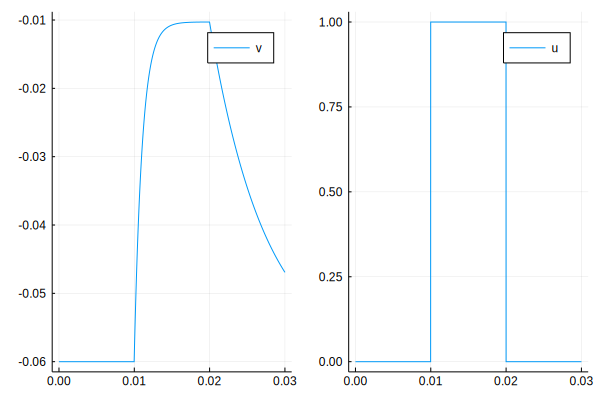

In [7]:
p3 = plot(t,v)
p4 = plot(t,u)
plot(p3,p4, label = ["v" "u"])

#### Sinusiodally Varying Proportion

In [8]:
# Euler Method
for i in 2:length(t)
   u[i] = 0.5 + 0.5*sin(t[i]*500-1.5)
    fde = -g_leak*(v[i-1]-V_rest)*dt/C - n*u[i]*g_mech*(v[i-1]-V_mech)*dt/C
    v[i] = v[i-1] + fde
end

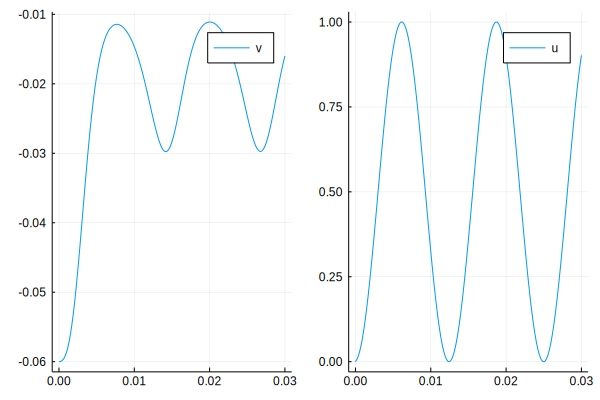

In [9]:
p5 = plot(t,v)
p6 = plot(t,u)
plot(p5,p6, label = ["v" "u"])

### 2e 
#### General Solution

Instead of using a numerical approach, we can formulate a general solution to the ODE with a little algebra and substitution:

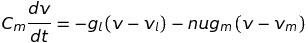

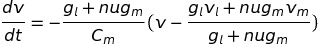

The constants outside of the brackets collapse to negative one over tau, which I will be calling $\alpha$, and the currents and conductances inside the bracket represent the steady state solution, which I will be calling $v_{inf}$ (as $\frac{dv}{dt}$ equals zero when v is equal to these terms).

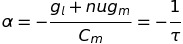

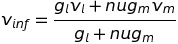

Thus, we can now express the equation in simpler terms and use substitution to derive a general solution.

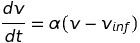

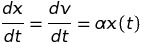

This differential equation has the general solution $ x = A e^{\alpha t} $, which we can solve for with an initial condition:

Thus, $$ x = x_{0} e^{\alpha t} = \big(v_{0} - v_{inf}\big) e^{\alpha t} = v - v_{inf} $$

$$ v = v_{inf} + \big(v_{0} - v_{inf}\big) e^{\alpha t} $$

In terms of our model, $v_{inf}$ is the steady state solution or equilibrium potential reached with all channels open, $ \big(v_{0} - v_{inf}\big) $ is the difference between the initial condition and this potential, and $\alpha$ is the time constant of the exponential function defined by the total conductance and capacitance of the membrane.

In [48]:
v_inf = (g_leak*V_rest + n*g_mech*V_mech)/(g_leak + n*g_mech)
alpha = - (g_leak + n*g_mech) / C;

In [49]:
for i in 2:length(t)
    fde = -g_leak*(v[i-1]-V_rest)*dt/C - n*g_mech*(v[i-1]-V_mech)*dt/C
    v[i] = v[i-1] + fde
    x[i] = v_inf + (V_rest - v_inf)*(exp(t[i]*alpha))
end
# I was struggling to plot the exponential function as is so had to run it like this

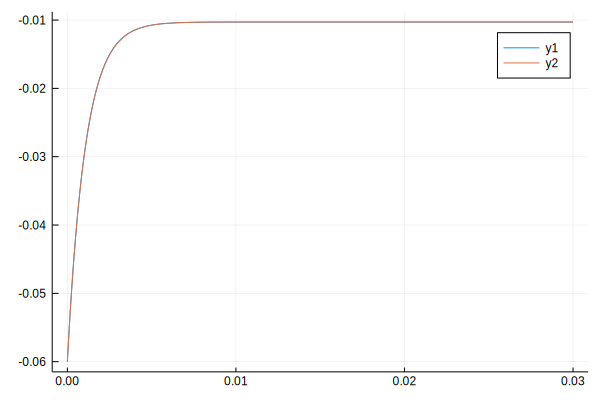

In [50]:
plot(t,v)
plot!(t,x)